In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.lines import Line2D


file_path = 'data/raw/' 

stores_file = os.path.join(file_path, 'stores data-set.csv')
features_file = os.path.join(file_path, 'Features data set.csv')
sales_file = os.path.join(file_path, 'sales data-set.csv')

In [2]:
#Carregando os DataFrames
df_stores = pd.read_csv(stores_file)
df_features = pd.read_csv(features_file)
df_sales = pd.read_csv(sales_file)

print("\nLojas (df_stores.head()):")
print(df_stores.head())
print("\nCaracterísticas (df_features.head()):")
print(df_features.head())
print("\nVendas (df_sales.head()):")
print(df_sales.head())


Lojas (df_stores.head()):
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Características (df_features.head()):
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4    

In [3]:
#Unindo df_sales com df_stores
#Fazendo join com 'Store'
print("\n=== Unindo Vendas com Lojas ===")
df_sales_stores = pd.merge(df_sales, df_stores, on='Store', how='left')
print("df_sales_stores.head():")
print(df_sales_stores.head())
print(f"Shape após unir Vendas e Lojas: {df_sales_stores.shape}")


=== Unindo Vendas com Lojas ===
df_sales_stores.head():
   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0      1     1  05/02/2010      24924.50      False    A  151315
1      1     1  12/02/2010      46039.49       True    A  151315
2      1     1  19/02/2010      41595.55      False    A  151315
3      1     1  26/02/2010      19403.54      False    A  151315
4      1     1  05/03/2010      21827.90      False    A  151315
Shape após unir Vendas e Lojas: (421570, 7)


In [4]:

#Unindo resultado (df_sales_stores) com df_features
#Fazendo join com 'Store' e 'Date'
print("\n=== Unindo o resultado com Características ===")
#Convertendo a coluna 'Date' para o tipo datetime pra garantir
df_sales_stores['Date'] = pd.to_datetime(df_sales_stores['Date'], format='%d/%m/%Y')
df_features['Date'] = pd.to_datetime(df_features['Date'], format='%d/%m/%Y')

df_final = pd.merge(df_sales_stores, df_features, on=['Store', 'Date'], how='left')

print("\n=== DataFrame Consolidado (df_final.head()) ===")
print(df_final.head())




=== Unindo o resultado com Características ===

=== DataFrame Consolidado (df_final.head()) ===
   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsH

In [5]:
print("\n=== Informações do DataFrame Consolidado (df_final.info()) ===")
df_final.info()

print(f"\nShape do DataFrame Consolidado: {df_final.shape}")
print(f"Número de lojas únicas: {df_final['Store'].nunique()}")
print(f"Número de departamentos únicos: {df_final['Dept'].nunique()}")
print(f"Período de datas: {df_final['Date'].min()} a {df_final['Date'].max()}")


=== Informações do DataFrame Consolidado (df_final.info()) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI 

In [6]:
#Verificando se há valores nulos após mergear
print("\n=== Verificação de Valores Nulos no DataFrame Final ===")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])


=== Verificação de Valores Nulos no DataFrame Final ===
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64


In [7]:
#Removendo uma coluna de isHoliday que duplicou no merge
df_copy = df_final.copy()

if df_copy['IsHoliday_x'].equals(df_copy['IsHoliday_y']):
    print("\nAs colunas 'IsHoliday_x' e 'IsHoliday_y' são iguais.")

    df_copy = df_copy.drop(columns=['IsHoliday_y'])
    print("Coluna 'IsHoliday_y' removida.")

    df_copy = df_copy.rename(columns={'IsHoliday_x': 'IsHoliday'})
    print("Coluna 'IsHoliday_x' renomeada para 'IsHoliday'.")
else:
    print("\nAs colunas 'IsHoliday_x' e 'IsHoliday_y' NÃO são iguais. Nenhuma alteração foi feita.")

print("\nNovas colunas:", df_copy.columns.tolist())


As colunas 'IsHoliday_x' e 'IsHoliday_y' são iguais.
Coluna 'IsHoliday_y' removida.
Coluna 'IsHoliday_x' renomeada para 'IsHoliday'.

Novas colunas: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


In [8]:
#Voltando para df_final
df_final = df_copy.copy()

#Visão Geral do DataFrame
print("\n1. Visão Geral do DataFrame:")
print("Dimensões do DataFrame (Linhas, Colunas):", df_final.shape)
print("\nInformações sobre as colunas (tipos de dados e não-nulos):")
df_final.info()

#Estatísticas Descritivas
print("\n2. Estatísticas Descritivas para Colunas Numéricas:")
print(df_final.describe())



1. Visão Geral do DataFrame:
Dimensões do DataFrame (Linhas, Colunas): (421570, 16)

Informações sobre as colunas (tipos de dados e não-nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-

In [9]:
#Verificação de Valores Ausentes
print("\n3. Verificação de Valores Ausentes:")
missing_values = df_final.isnull().sum()
missing_percentage = (df_final.isnull().sum() / len(df_final)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
print(missing_df)

if missing_df.empty:
    print("Não há valores ausentes no DataFrame.")
else:
    print("\nColunas com valores ausentes identificadas.")


3. Verificação de Valores Ausentes:
           Missing Count  Missing Percentage (%)
MarkDown2         310322               73.611025
MarkDown4         286603               67.984676
MarkDown3         284479               67.480845
MarkDown1         270889               64.257181
MarkDown5         270138               64.079038

Colunas com valores ausentes identificadas.



4. Análise da Variável Alvo: Weekly_Sales
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


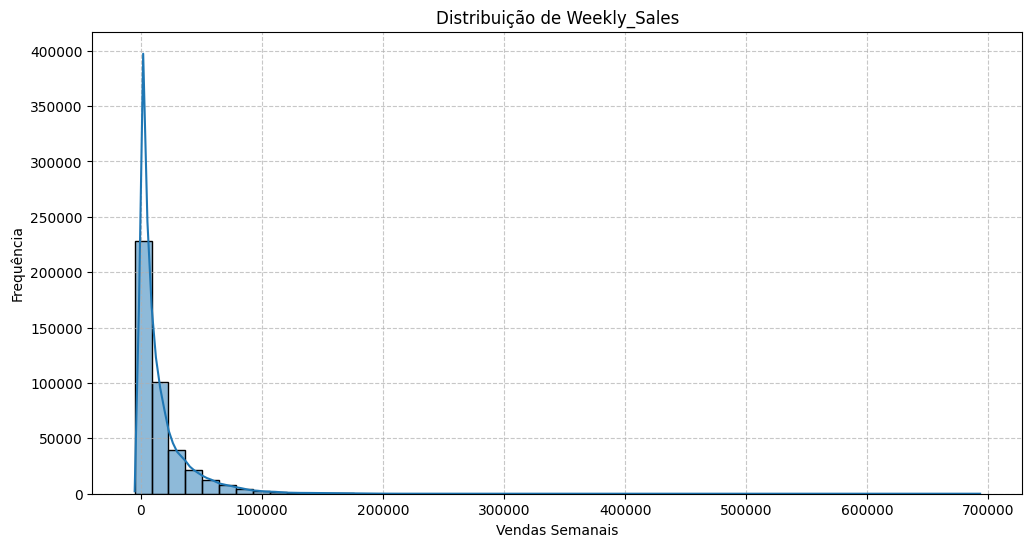

In [10]:
#Análise de Vendas
print("\n4. Análise da Variável Alvo: Weekly_Sales")
print(df_final['Weekly_Sales'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df_final['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribuição de Weekly_Sales')
plt.xlabel('Vendas Semanais')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [11]:
#Identificando vendas muito baixas ou negativas (possíveis outliers ou erros)
print(f"\nNúmero de vendas <= 0: {(df_final['Weekly_Sales'] <= 0).sum()} ({(df_final['Weekly_Sales'] <= 0).sum()/len(df_final)*100:.2f}%)")
if (df_final['Weekly_Sales'] <= 0).any():
    print("Vendas não positivas detectadas. Isso pode indicar devoluções ou erros de registro.")


Número de vendas <= 0: 1358 (0.32%)
Vendas não positivas detectadas. Isso pode indicar devoluções ou erros de registro.



5. Análise de Variáveis Categóricas:
Número de Lojas Únicas: 45

Top 10 Lojas por Média de Vendas Semanais:
Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
10    26332.303819
27    24826.984536
6     21913.243624
1     21710.543621
39    21000.763562
Name: Weekly_Sales, dtype: float64

Bottom 10 Lojas por Média de Vendas Semanais:
Store
5     5053.415813
33    5728.414053
44    6038.929814
3     6373.033983
38    7492.478460
16    7863.224124
29    8158.810609
7     8358.766148
36    8584.412563
30    8764.237719
Name: Weekly_Sales, dtype: float64

Número de Departamentos Únicos: 81

Top 10 Departamentos por Média de Vendas Semanais:
Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


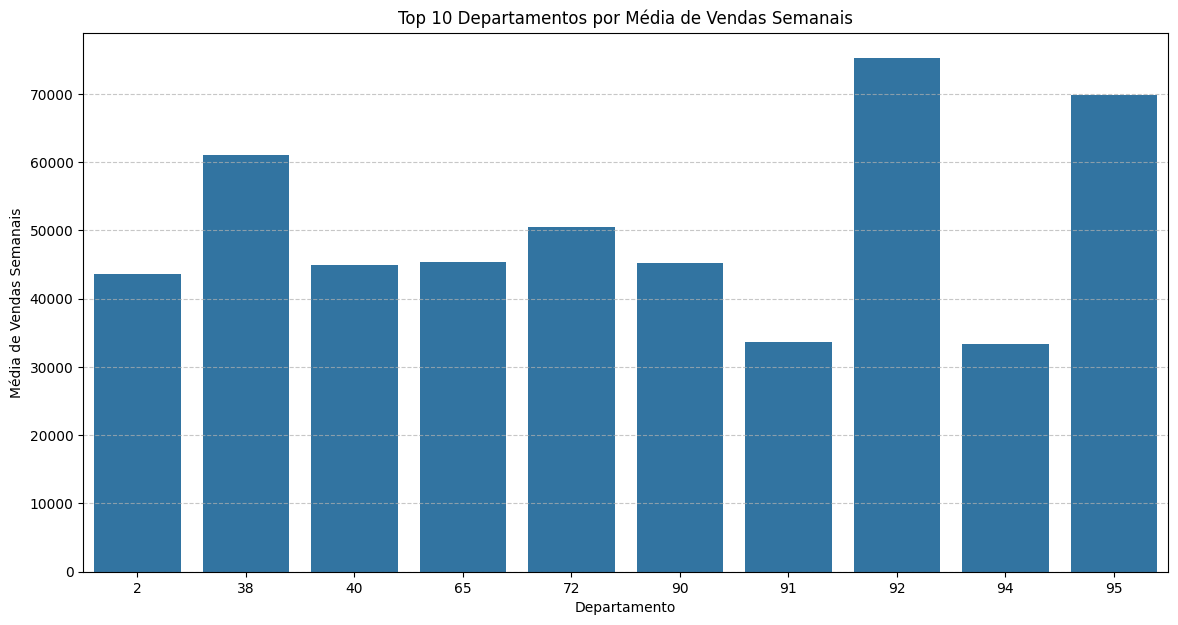


Distribuição de Tipos de Loja:
Type
A    215478
B    163495
C     42597
Name: count, dtype: int64


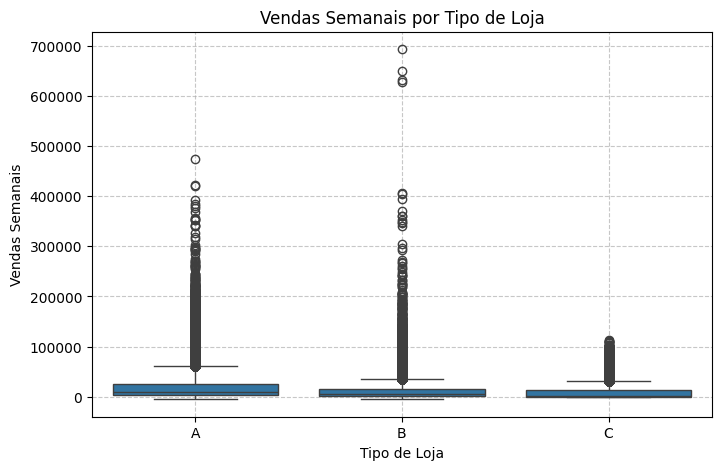


Distribuição de IsHoliday:
IsHoliday
False    391909
True      29661
Name: count, dtype: int64


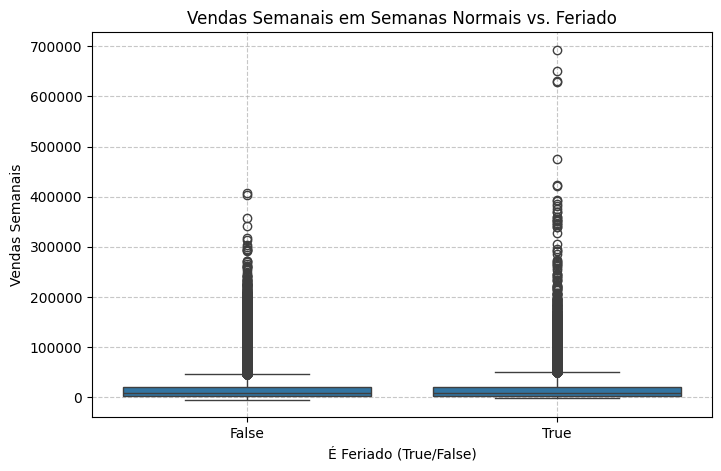

In [12]:
print("\n5. Análise de Variáveis Categóricas:")

print(f"Número de Lojas Únicas: {df_final['Store'].nunique()}")

#Olhando para as 10 lojas com maiores e menores vendas médias
top_10_stores = df_final.groupby('Store')['Weekly_Sales'].mean().nlargest(10)
bottom_10_stores = df_final.groupby('Store')['Weekly_Sales'].mean().nsmallest(10)
print("\nTop 10 Lojas por Média de Vendas Semanais:")
print(top_10_stores)
print("\nBottom 10 Lojas por Média de Vendas Semanais:")
print(bottom_10_stores)

# Dept (Departamento)
print(f"\nNúmero de Departamentos Únicos: {df_final['Dept'].nunique()}")
#Top 10 departamentos por vendas médias
top_10_depts = df_final.groupby('Dept')['Weekly_Sales'].mean().nlargest(10)
print("\nTop 10 Departamentos por Média de Vendas Semanais:")
print(top_10_depts)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_depts.index, y=top_10_depts.values)
plt.title('Top 10 Departamentos por Média de Vendas Semanais')
plt.xlabel('Departamento')
plt.ylabel('Média de Vendas Semanais')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Type (Tipo de Loja)
print("\nDistribuição de Tipos de Loja:")
print(df_final['Type'].value_counts())
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df_final)
plt.title('Vendas Semanais por Tipo de Loja')
plt.xlabel('Tipo de Loja')
plt.ylabel('Vendas Semanais')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#IsHoliday (Indica se é semana de feriado)
print("\nDistribuição de IsHoliday:")
print(df_final['IsHoliday'].value_counts())
plt.figure(figsize=(8, 5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df_final)
plt.title('Vendas Semanais em Semanas Normais vs. Feriado')
plt.xlabel('É Feriado (True/False)')
plt.ylabel('Vendas Semanais')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




Análise de Tendências Temporais (Agregado) com Feriados Marcados:


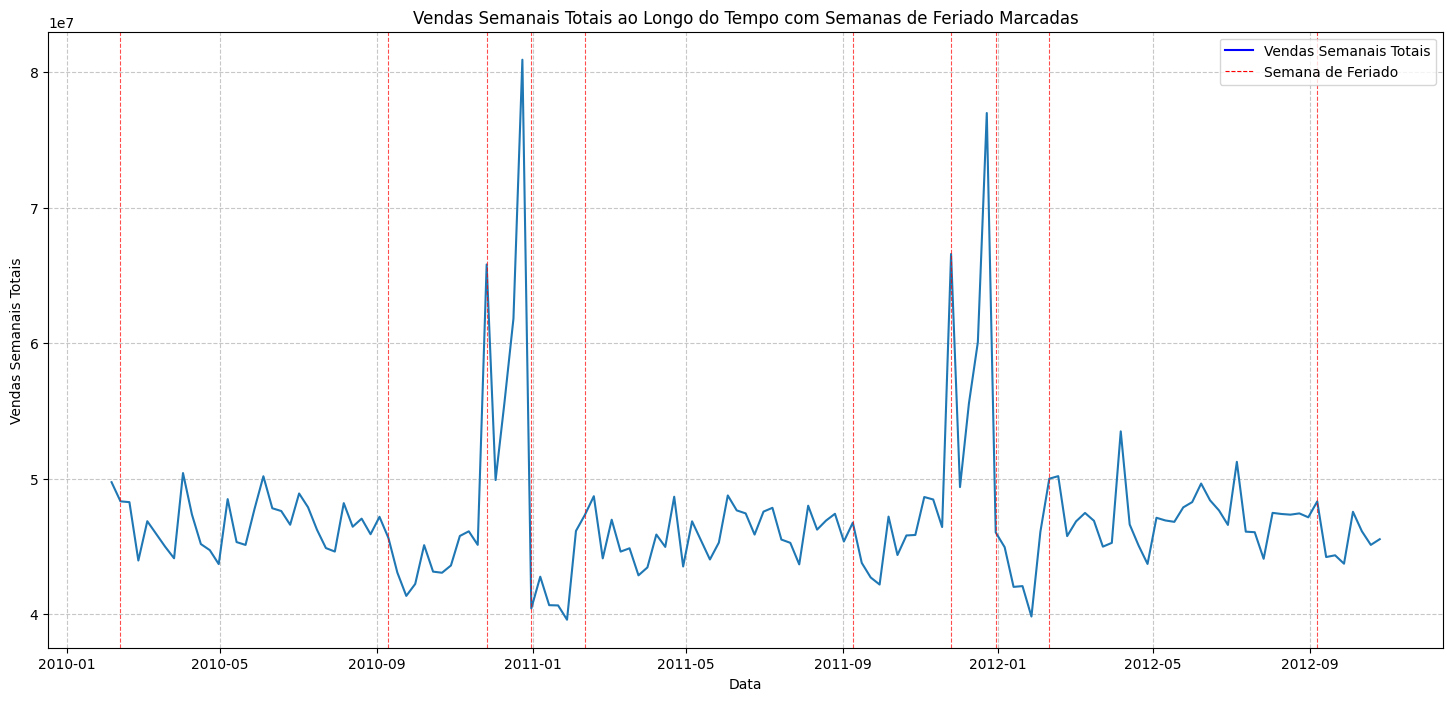

In [13]:
print("\nAnálise de Tendências Temporais (Agregado) com Feriados Marcados:")
df_time_series = df_final.groupby('Date')['Weekly_Sales'].sum().reset_index()

holiday_dates = df_final[df_final['IsHoliday'] == True]['Date'].unique()

plt.figure(figsize=(18, 8))
plt.plot(df_time_series['Date'], df_time_series['Weekly_Sales'], label='Vendas Semanais Totais')

#Marcando as semanas de feriado no gráfico
for date in holiday_dates:
    plt.axvline(x=date, color='r', linestyle='--', linewidth=0.8, alpha=0.7)

legend_elements = [Line2D([0], [0], color='r', linestyle='--', linewidth=0.8, label='Semana de Feriado')]
plt.legend(handles=[plt.Line2D([0], [0], color='blue', label='Vendas Semanais Totais')] + legend_elements)

plt.title('Vendas Semanais Totais ao Longo do Tempo com Semanas de Feriado Marcadas')
plt.xlabel('Data')
plt.ylabel('Vendas Semanais Totais')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Matriz de Correlação para Todas as Variáveis Numéricas Relevantes:
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales      1.000000    -0.002312   -0.000120 -0.020921     -0.025864   
Temperature      -0.002312     1.000000    0.143859  0.182112      0.096730   
Fuel_Price       -0.000120     0.143859    1.000000 -0.164210     -0.033853   
CPI              -0.020921     0.182112   -0.164210  1.000000     -0.299953   
Unemployment     -0.025864     0.096730   -0.033853 -0.299953      1.000000   
Size              0.243828    -0.058313    0.003361 -0.003314     -0.068238   
MarkDown1         0.085251    -0.040594    0.061371 -0.055558      0.050285   
MarkDown2         0.024130    -0.323927   -0.220895 -0.039534      0.020940   
MarkDown3         0.060385    -0.096880   -0.102092 -0.023590      0.012818   
MarkDown4         0.045414    -0.063947   -0.044986 -0.049628      0.024963   
MarkDown5         0.090362    -0.017544   -0.128065  0.060630  

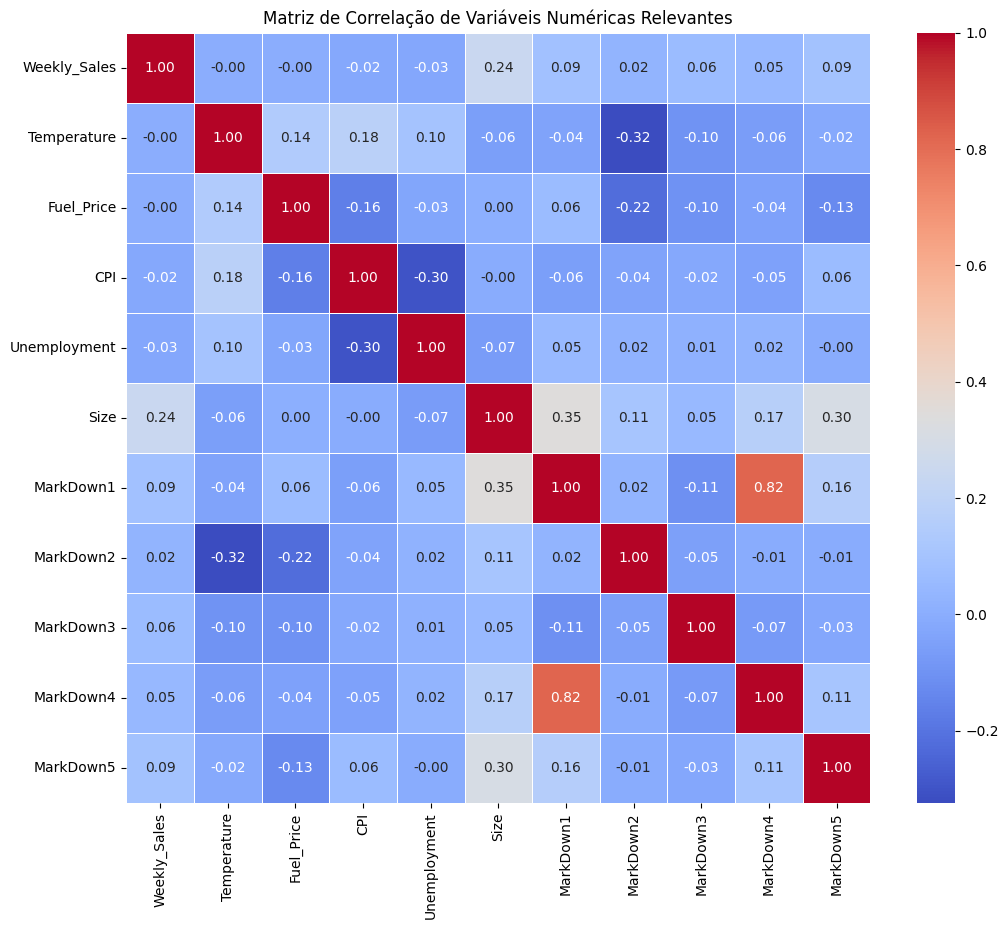

In [14]:
#Correlação entre variáveis numéricas
print("\nMatriz de Correlação para Todas as Variáveis Numéricas Relevantes:")

numeric_cols_for_corr = [
    'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'
]

existing_numeric_cols = [col for col in numeric_cols_for_corr if col in df_final.columns]

correlation_matrix = df_final[existing_numeric_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação de Variáveis Numéricas Relevantes')
plt.show()

Pre-process

In [15]:
print("\nTratamento de valores ausentes:")
print("Valores ausentes ANTES do tratamento:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])


Tratamento de valores ausentes:
Valores ausentes ANTES do tratamento:
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64


In [16]:
#Estratégias de Imputação:

#MarkDowns (MarkDown1 a MarkDown5):
#Geralmente, valores NaN em MarkDowns significam que não houve essa variável naquele período/loja.
#Então vou imputar com 0 que faz sentido.

markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    if col in df_final.columns:
        df_final[col] = df_final[col].fillna(0)
        print(f"Imputado 0 para valores ausentes em: {col}")

#CPI (Consumer Price Index) e Unemployment (Taxa de Desemprego):
#Estes são dados econômicos que tendem a ser mais estáveis ou com uma tendência linear.
#Imputar com a média ou mediana, ou até mesmo com a interpolação.
#Vamos usar interpolação linear, seguida por preenchimento de quaisquer NaNs restantes com a média
economic_cols = ['CPI', 'Unemployment']
for col in economic_cols:
    if col in df_final.columns:
        df_final[col] = df_final[col].interpolate(method='linear', limit_direction='both')
        if df_final[col].isnull().any():
            df_final[col].fillna(df_final[col].mean(), inplace=True)
        print(f"Imputado (interpolação/média) para valores ausentes em: {col}")

#Verificando novamente os valores ausentes após o tratamento
print("\nValores ausentes DEPOIS do tratamento (apenas colunas com NaNs antes):")
missing_after_treatment = df_final.isnull().sum()
missing_after_treatment = missing_after_treatment[missing_after_treatment > 0]
if missing_after_treatment.empty:
    print("Nenhum valor ausente restante nas colunas previamente afetadas.")
else:
    print(missing_after_treatment)


Imputado 0 para valores ausentes em: MarkDown1
Imputado 0 para valores ausentes em: MarkDown2
Imputado 0 para valores ausentes em: MarkDown3
Imputado 0 para valores ausentes em: MarkDown4
Imputado 0 para valores ausentes em: MarkDown5
Imputado (interpolação/média) para valores ausentes em: CPI
Imputado (interpolação/média) para valores ausentes em: Unemployment

Valores ausentes DEPOIS do tratamento (apenas colunas com NaNs antes):
Nenhum valor ausente restante nas colunas previamente afetadas.


In [17]:
print("\nTratamento de Outliers:")

#Tratamento de Weekly_Sales <= 0 (vendas não positivas)
#Optando por remover as linhas com Weekly_Sales <= 0 por simplicidade,
#Assumindo que representam devoluções ou erros que não quero que o modelo aprenda como "vendas".

initial_rows = df_final.shape[0]
df_final = df_final[df_final['Weekly_Sales'] > 0]
removed_rows_sales = initial_rows - df_final.shape[0]
print(f"Removidas {removed_rows_sales} linhas onde 'Weekly_Sales' era <= 0.")
print(f"Novo shape do DataFrame após remover vendas <= 0: {df_final.shape}")


Tratamento de Outliers:
Removidas 1358 linhas onde 'Weekly_Sales' era <= 0.
Novo shape do DataFrame após remover vendas <= 0: (420212, 16)


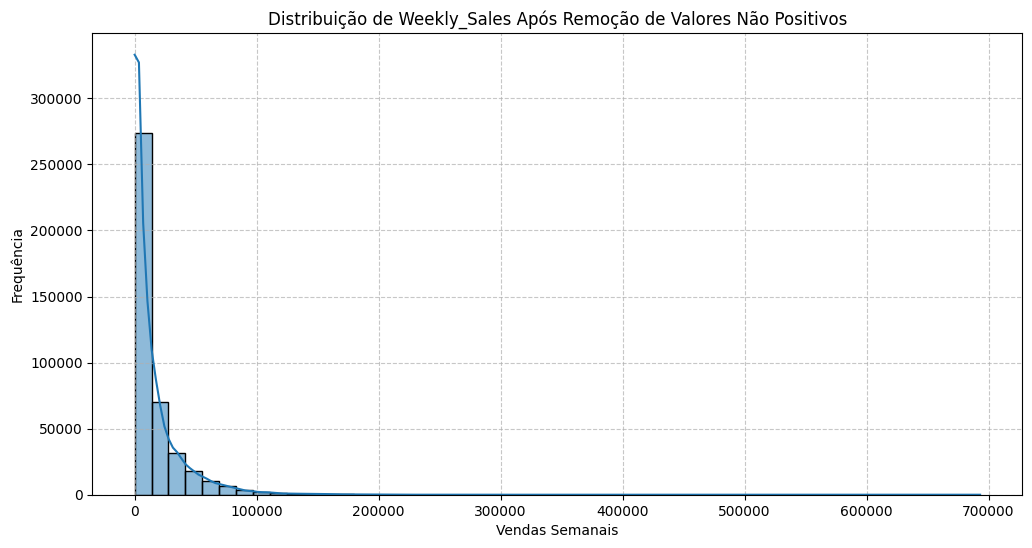

In [18]:
# Visualização da distribuição de Weekly_Sales após tratamento
plt.figure(figsize=(12, 6))
sns.histplot(df_final['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribuição de Weekly_Sales Após Remoção de Valores Não Positivos')
plt.xlabel('Vendas Semanais')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [19]:
print("\n=== Tratamento de Valores Ausentes e Outliers Concluído ===")
print("Novo shape do DataFrame Finalizado:", df_final.shape)
df_final.info()


=== Tratamento de Valores Ausentes e Outliers Concluído ===
Novo shape do DataFrame Finalizado: (420212, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Type          420212 non-null  object        
 6   Size          420212 non-null  int64         
 7   Temperature   420212 non-null  float64       
 8   Fuel_Price    420212 non-null  float64       
 9   MarkDown1     420212 non-null  float64       
 10  MarkDown2     420212 non-null  float64       
 11  MarkDown3     420212 non-null  float64       
 12  MarkDown4     420212 non-null  float64       
 13  MarkDown5     

In [20]:
print("\n=== Início da Engenharia de Features de Data e Feriados ===")

df_final['Date'] = pd.to_datetime(df_final['Date'])
print(f"Tipo da coluna 'Date' após verificação: {df_final['Date'].dtype}")

df_final['Year'] = df_final['Date'].dt.year
df_final['Month'] = df_final['Date'].dt.month
df_final['Week'] = df_final['Date'].dt.isocalendar().week.astype(int) # isocalendar().week para num da semana ISO
df_final['Day'] = df_final['Date'].dt.day
df_final['DayOfWeek'] = df_final['Date'].dt.dayofweek # Monday=0, Sunday=6
df_final['DayOfYear'] = df_final['Date'].dt.dayofyear

print("\nNovas colunas temporais adicionadas:")
print(df_final[['Date', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'DayOfYear']].head())


=== Início da Engenharia de Features de Data e Feriados ===
Tipo da coluna 'Date' após verificação: datetime64[ns]

Novas colunas temporais adicionadas:
        Date  Year  Month  Week  Day  DayOfWeek  DayOfYear
0 2010-02-05  2010      2     5    5          4         36
1 2010-02-12  2010      2     6   12          4         43
2 2010-02-19  2010      2     7   19          4         50
3 2010-02-26  2010      2     8   26          4         57
4 2010-03-05  2010      3     9    5          4         64


In [21]:
#Criar Variáveis Binárias para Feriados Específicos
#Baseado na descrição do dataset e nas datas típicas dos feriados.

#Super Bowl: 1º ou 2º domingo de fevereiro (Semanas 5-7, mas geralmente semana 6 para o pico)
#Labor Day: 1ª segunda-feira de setembro (Semanas 35-37, geralmente semana 36)
#Thanksgiving: 4ª quinta-feira de novembro (Semanas 47-48, geralmente semana 47 para o pico de vendas)
#Christmas: 25 de dezembro (Semanas 51-52, ou semana 50-51 para o pico de vendas pré-natal)

#Criando coluna 'IsHoliday_Flag' 1 ou 0
df_final['IsHoliday_Flag'] = df_final['IsHoliday'].astype(int)


In [22]:
#Identificar feriados específicos (com base em IsHoliday=True e Month/Week)
#Criando a paritr do IsHoliday e as semanas aproximadas para novas flags.

df_final['SuperBowl'] = ((df_final['Month'] == 2) & (df_final['Week'].isin([6, 7])) & (df_final['IsHoliday'] == True)).astype(int)
df_final['LaborDay'] = ((df_final['Month'] == 9) & (df_final['Week'].isin([36])) & (df_final['IsHoliday'] == True)).astype(int)
df_final['Thanksgiving'] = ((df_final['Month'] == 11) & (df_final['Week'].isin([47])) & (df_final['IsHoliday'] == True)).astype(int)
df_final['Christmas'] = ((df_final['Month'] == 12) & (df_final['Week'].isin([51, 52])) & (df_final['IsHoliday'] == True)).astype(int) # Semana do Natal e talvez a anterior


In [23]:
#Verificando se as flags de feriado foram criadas corretamente
print("\nVerificação das novas flags de feriado (amostra):")
print(df_final[df_final['IsHoliday'] == True][['Date', 'IsHoliday', 'SuperBowl', 'LaborDay', 'Thanksgiving', 'Christmas']].drop_duplicates().head(10))



Verificação das novas flags de feriado (amostra):
          Date  IsHoliday  SuperBowl  LaborDay  Thanksgiving  Christmas
1   2010-02-12       True          1         0             0          0
31  2010-09-10       True          0         1             0          0
42  2010-11-26       True          0         0             1          0
47  2010-12-31       True          0         0             0          1
53  2011-02-11       True          1         0             0          0
83  2011-09-09       True          0         1             0          0
94  2011-11-25       True          0         0             1          0
99  2011-12-30       True          0         0             0          1
105 2012-02-10       True          1         0             0          0
135 2012-09-07       True          0         1             0          0


In [24]:
print("\n=== Engenharia de Features de Data e Feriados Concluída ===")
print("Novo shape do DataFrame após engenharia de features:", df_final.shape)
print("Verificação de colunas adicionadas e seus tipos:")
df_final.info()


=== Engenharia de Features de Data e Feriados Concluída ===
Novo shape do DataFrame após engenharia de features: (420212, 27)
Verificação de colunas adicionadas e seus tipos:
<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           420212 non-null  int64         
 1   Dept            420212 non-null  int64         
 2   Date            420212 non-null  datetime64[ns]
 3   Weekly_Sales    420212 non-null  float64       
 4   IsHoliday       420212 non-null  bool          
 5   Type            420212 non-null  object        
 6   Size            420212 non-null  int64         
 7   Temperature     420212 non-null  float64       
 8   Fuel_Price      420212 non-null  float64       
 9   MarkDown1       420212 non-null  float64       
 10  MarkDown2       420212 non-null  float64       
 11  MarkDown3       420212 n

In [25]:
print("\n=== Início da Aplicação do Peso de Feriados (5x) ===")

#Coluna 'Sample_Weight'
df_final['Sample_Weight'] = 1.0

#Define o peso como 5.0 onde 'IsHoliday' é True
df_final.loc[df_final['IsHoliday_Flag'] == 1, 'Sample_Weight'] = 5.0

print("\nColuna 'Sample_Weight' criada e pesos aplicados.")


=== Início da Aplicação do Peso de Feriados (5x) ===

Coluna 'Sample_Weight' criada e pesos aplicados.


In [26]:
#Verificando
print("\nVerificação da coluna 'Sample_Weight':")
print(df_final[['Date', 'IsHoliday', 'Weekly_Sales', 'Sample_Weight']].head(10))

print("\nContagem de pesos na coluna 'Sample_Weight':")
print(df_final['Sample_Weight'].value_counts())

num_holidays = df_final['IsHoliday'].sum() # True conta como 1
num_weighted_samples = (df_final['Sample_Weight'] == 5.0).sum()

print(f"\nNúmero de semanas com IsHoliday = True: {num_holidays}")
print(f"Número de amostras com Sample_Weight = 5.0: {num_weighted_samples}")
if num_holidays == num_weighted_samples:
    print("A contagem de semanas de feriado e amostras pesadas coincide. OK!")
else:
    print("ATENÇÃO: A contagem de semanas de feriado e amostras pesadas NÃO coincide. Reverificar a lógica.")



Verificação da coluna 'Sample_Weight':
        Date  IsHoliday  Weekly_Sales  Sample_Weight
0 2010-02-05      False      24924.50            1.0
1 2010-02-12       True      46039.49            5.0
2 2010-02-19      False      41595.55            1.0
3 2010-02-26      False      19403.54            1.0
4 2010-03-05      False      21827.90            1.0
5 2010-03-12      False      21043.39            1.0
6 2010-03-19      False      22136.64            1.0
7 2010-03-26      False      26229.21            1.0
8 2010-04-02      False      57258.43            1.0
9 2010-04-09      False      42960.91            1.0

Contagem de pesos na coluna 'Sample_Weight':
Sample_Weight
1.0    390652
5.0     29560
Name: count, dtype: int64

Número de semanas com IsHoliday = True: 29560
Número de amostras com Sample_Weight = 5.0: 29560
A contagem de semanas de feriado e amostras pesadas coincide. OK!


In [27]:
print("\n=== Aplicação do Peso de Feriados Concluída ===")
print("Novo shape do DataFrame Finalizado:", df_final.shape)
print("Verificação final dos tipos de colunas:")
df_final.info()


=== Aplicação do Peso de Feriados Concluída ===
Novo shape do DataFrame Finalizado: (420212, 28)
Verificação final dos tipos de colunas:
<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           420212 non-null  int64         
 1   Dept            420212 non-null  int64         
 2   Date            420212 non-null  datetime64[ns]
 3   Weekly_Sales    420212 non-null  float64       
 4   IsHoliday       420212 non-null  bool          
 5   Type            420212 non-null  object        
 6   Size            420212 non-null  int64         
 7   Temperature     420212 non-null  float64       
 8   Fuel_Price      420212 non-null  float64       
 9   MarkDown1       420212 non-null  float64       
 10  MarkDown2       420212 non-null  float64       
 11  MarkDown3       420212 non-null  float64       
 12  MarkDown4

In [28]:
print("\n=== Início da Engenharia de Features de Desconto ===")

markdown_cols_existing = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

existing_markdown_cols = [col for col in markdown_cols_existing if col in df_final.columns]

if not existing_markdown_cols:
    print("Nenhuma coluna MarkDown encontrada no DataFrame. Nenhuma feature de desconto será criada.")
else:
    #Calculando TotalMarkDown
    df_final['TotalMarkDown'] = df_final[existing_markdown_cols].sum(axis=1)
    print(f"Coluna 'TotalMarkDown' criada. Primeiras 5 linhas:\n{df_final['TotalMarkDown'].head()}")

    #Criando uma variável HasAnyMarkDown (binária)
    df_final['HasAnyMarkDown'] = (df_final['TotalMarkDown'] > 0).astype(int)
    print(f"\nColuna 'HasAnyMarkDown' criada. Primeiras 5 linhas:\n{df_final['HasAnyMarkDown'].head()}")
    print("\nContagem de 'HasAnyMarkDown':")
    print(df_final['HasAnyMarkDown'].value_counts())

    #Criando flags binárias para cada MarkDown individualmente
    for col in existing_markdown_cols:
        df_final[f'Has_{col}'] = (df_final[col] > 0).astype(int)
    print("\nFlags binárias para MarkDowns individuais criadas (ex: Has_MarkDown1).")
    print(df_final[[f'Has_{col}' for col in existing_markdown_cols]].head())



=== Início da Engenharia de Features de Desconto ===
Coluna 'TotalMarkDown' criada. Primeiras 5 linhas:
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TotalMarkDown, dtype: float64

Coluna 'HasAnyMarkDown' criada. Primeiras 5 linhas:
0    0
1    0
2    0
3    0
4    0
Name: HasAnyMarkDown, dtype: int64

Contagem de 'HasAnyMarkDown':
HasAnyMarkDown
0    269283
1    150929
Name: count, dtype: int64

Flags binárias para MarkDowns individuais criadas (ex: Has_MarkDown1).
   Has_MarkDown1  Has_MarkDown2  Has_MarkDown3  Has_MarkDown4  Has_MarkDown5
0              0              0              0              0              0
1              0              0              0              0              0
2              0              0              0              0              0
3              0              0              0              0              0
4              0              0              0              0              0


In [29]:
#Verificação final
print("\n=== Engenharia de Features de Desconto Concluída ===")
print("Novo shape do DataFrame após engenharia de features de desconto:", df_final.shape)
print("Verificação de colunas adicionadas e seus tipos:")
df_final.info()


=== Engenharia de Features de Desconto Concluída ===
Novo shape do DataFrame após engenharia de features de desconto: (420212, 35)
Verificação de colunas adicionadas e seus tipos:
<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           420212 non-null  int64         
 1   Dept            420212 non-null  int64         
 2   Date            420212 non-null  datetime64[ns]
 3   Weekly_Sales    420212 non-null  float64       
 4   IsHoliday       420212 non-null  bool          
 5   Type            420212 non-null  object        
 6   Size            420212 non-null  int64         
 7   Temperature     420212 non-null  float64       
 8   Fuel_Price      420212 non-null  float64       
 9   MarkDown1       420212 non-null  float64       
 10  MarkDown2       420212 non-null  float64       
 11  MarkDown3       420

In [31]:
#Salvando em um csv
df_final.to_csv('data/df_tratado.csv', index=False)